# Freesurfer Exploration

We want to use an alternate brain atlas for extracting the regions of ventral visual stream. To do this, we need to use Freesurfer.

Based on the great tutorial here:
https://ggooo.wordpress.com/2014/10/12/extracting-a-volumetric-roi-from-an-annotation-file/

In [306]:
from pathlib import Path
from IPython.display import Image, display
import nibabel as nib
import pandas as pd
import numpy as np
from nilearn import image, plotting

### Directories

In [17]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')
subjects_dir = dataset_v1 / 'derivatives' / 'freesurfer'

In [10]:
%env SUBJECTS_DIR=/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer

env: SUBJECTS_DIR=/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer


In [18]:
subjects_dir

PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer')

In [28]:
%ll {subjects_dir}

total 24
drwxrws--- 8 wpickard 4096 Apr 14 11:14 fsaverage/
drwxrws--- 8 wpickard 4096 Apr 14 11:14 sub-CSI1/
drwxrws--- 8 wpickard 4096 Apr 14 11:14 sub-CSI2/
drwxrws--- 8 wpickard 4096 Apr 14 11:14 sub-CSI3/
drwxrws--- 8 wpickard 4096 Apr 14 11:15 sub-CSI4/
-rw-rw---- 1 wpickard  194 May 11 12:35 surfer.log


## vcAtlas

In [41]:
!freeview -f {subjects_dir}/fsaverage/surf/lh.white:annot=Rosenke_vcAtlas \
          -f {subjects_dir}/fsaverage/surf/rh.white:annot=Rosenke_vcAtlas \
          -view 'inferior'

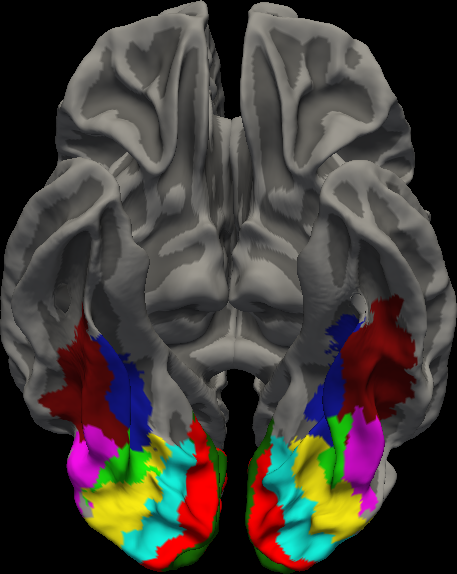

In [42]:
Image('freesurfer_figs/fsaverage_vcAtlas_inferior.png')

### Extract Color LUT for vcAtlas

In [428]:
labels, ctab, names = nib.freesurfer.io.read_annot(subjects_dir / 'fsaverage' / 'label' / 'lh.Rosenke_vcAtlas.annot')

In [429]:
ctab

array([[       0,        0,        0,        0,        0],
       [      27,      114,        6,        0,   422427],
       [     255,        0,        0,        0,      255],
       [      20,      242,      234,        0, 15397396],
       [     242,      234,       20,        0,  1370866],
       [      29,      246,       14,        0,   980509],
       [     238,       14,      246,        0, 16125678],
       [      22,       27,      174,        0, 11410198],
       [     122,       12,       12,        0,   789626]], dtype=int32)

In [430]:
vcAtlas_LUT = pd.DataFrame([name.decode('UTF-8') for name in names], columns=['Name'])

In [431]:
vcAtlas_LUT[['R', 'G', 'B', 'A']] = ctab[:,:-1]

In [432]:
vcAtlas_LUT

Name    R    G    B  A
0  Unknown    0    0    0  0
1     hOc1   27  114    6  0
2     hOc2  255    0    0  0
3    hOc3v   20  242  234  0
4    hOc4v  242  234   20  0
5      FG1   29  246   14  0
6      FG2  238   14  246  0
7      FG3   22   27  174  0
8      FG4  122   12   12  0

In [433]:
vcAtlas_LUT.to_csv(Path('freesurfer') / 'Rosenke_vcAtlasLUT.txt', sep='\t', index_label='#')

### Extract Color LUT for visfAtlas

NOTE: LH and RH appear to be quite different

#### LH

In [434]:
labels, ctab, names = nib.freesurfer.io.read_annot(subjects_dir / 'fsaverage' / 'label' / 'lh.visfAtlas.annot')

In [435]:
ctab

array([[       0,        0,        0,        0,        0],
       [     239,       59,       44,        0,  2898927],
       [     203,       24,       29,        0,  1906891],
       [     153,        0,       13,        0,   852121],
       [       0,      109,       44,        0,  2911488],
       [     199,      233,      192,        0, 12642759],
       [      35,      139,       69,        0,  4557603],
       [     116,      196,      118,        0,  7783540],
       [     254,      178,       76,        0,  5026558],
       [     254,      217,      118,        0,  7789054],
       [      84,       39,      143,        0,  9381716],
       [     141,      211,      199,        0, 13095821],
       [     198,      219,      239,        0, 15719366],
       [     158,      202,      225,        0, 14797470],
       [     107,      174,      214,        0, 14069355],
       [      66,      146,      198,        0, 13013570],
       [      33,      113,      181,        0, 11890977

In [436]:
visfAtlas_LUT = pd.DataFrame([name.decode('UTF-8') for name in names], columns=['Name'])

In [437]:
visfAtlas_LUT[['R', 'G', 'B', 'A']] = ctab[:,:-1]

In [438]:
visfAtlas_LUT

Name    R    G    B  A
0           Unknown    0    0    0  0
1        mFus-faces  239   59   44  0
2        pFus-faces  203   24   29  0
3         IOG-faces  153    0   13  0
4        OTS-bodies    0  109   44  0
5        ITG-bodies  199  233  192  0
6        MTG-bodies   35  139   69  0
7        LOS-bodies  116  196  118  0
8   pOTS-characters  254  178   76  0
9    IOS-characters  254  217  118  0
10       CoS-places   84   39  143  0
11              hMT  141  211  199  0
12              v1d  198  219  239  0
13              v2d  158  202  225  0
14              v3d  107  174  214  0
15              v1v   66  146  198  0
16              v2v   33  113  181  0
17              v3v    8   69  148  0

In [439]:
visfAtlas_LUT.to_csv(Path('freesurfer') / 'lh.visfAtlasLUT.txt', sep='\t', index_label='#')

#### RH

In [440]:
labels, ctab, names = nib.freesurfer.io.read_annot(subjects_dir / 'fsaverage' / 'label' / 'rh.visfAtlas.annot')
df_ctab = pd.DataFrame([name.decode('UTF-8') for name in names], columns=['Name'])
df_ctab[['R', 'G', 'B', 'A']] = ctab[:,:-1]
df_ctab.to_csv(Path('freesurfer') / 'rh.visfAtlasLUT.txt', sep='\t', index_label='#')

## Transform using mri_surf2surf

In [32]:
!mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi lh --sval-annot Rosenke_vcAtlas --tval lh.Rosenke_vcAtlas.annot

Setting mapmethod to nnf

7.2.0

setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
cd /s/chopin/a/grad/wpickard/fmri-gen
mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi lh --sval-annot Rosenke_vcAtlas --tval lh.Rosenke_vcAtlas.annot 

sysname  Linux
hostname blue
machine  x86_64
user     wpickard
srcsubject = fsaverage
srcval     = (null)
srctype    = 
trgsubject = sub-CSI1
trgval     = lh.Rosenke_vcAtlas.annot
trgtype    = 
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source surface reg /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.sphere.reg
Loading source data
Reading surface file /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.orig
Reading target surface 

In [33]:
!mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi rh --sval-annot Rosenke_vcAtlas --tval rh.Rosenke_vcAtlas.annot

Setting mapmethod to nnf

7.2.0

setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
cd /s/chopin/a/grad/wpickard/fmri-gen
mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi rh --sval-annot Rosenke_vcAtlas --tval rh.Rosenke_vcAtlas.annot 

sysname  Linux
hostname blue
machine  x86_64
user     wpickard
srcsubject = fsaverage
srcval     = (null)
srctype    = 
trgsubject = sub-CSI1
trgval     = rh.Rosenke_vcAtlas.annot
trgtype    = 
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source surface reg /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/rh.sphere.reg
Loading source data
Reading surface file /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/rh.orig
Reading target surface 

In [35]:
!freeview -f {subjects_dir}/sub-CSI1/surf/lh.white:annot=Rosenke_vcAtlas \
          -f {subjects_dir}/sub-CSI1/surf/rh.white:annot=Rosenke_vcAtlas

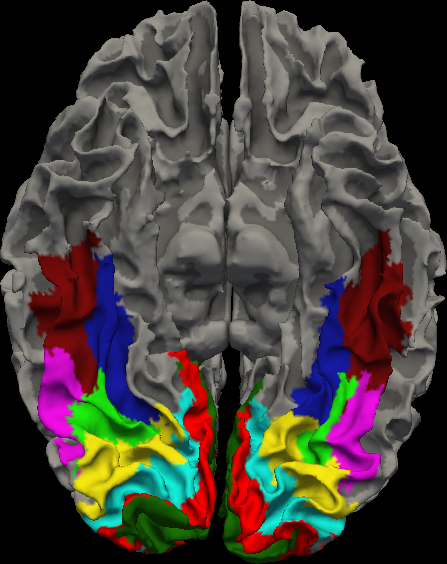

In [39]:
Image('freesurfer_figs/sub-CSI1_vcAtlas_inferior.png')

### Perform for each subject

In [58]:
%%bash
for subject in {1..4}
do
    for hemi in lh rh
    do
        mri_surf2surf --srcsubject fsaverage \
                      --trgsubject sub-CSI$subject \
                      --hemi $hemi \
                      --sval-annot Rosenke_vcAtlas \
                      --tval ${hemi}.Rosenke_vcAtlas.annot
    done
done

Setting mapmethod to nnf

7.2.0

setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
cd /s/chopin/a/grad/wpickard/fmri-gen
mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi lh --sval-annot Rosenke_vcAtlas --tval lh.Rosenke_vcAtlas.annot 

sysname  Linux
hostname blue
machine  x86_64
user     wpickard
srcsubject = fsaverage
srcval     = (null)
srctype    = 
trgsubject = sub-CSI1
trgval     = lh.Rosenke_vcAtlas.annot
trgtype    = 
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source surface reg /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.sphere.reg
Loading source data
Reading surface file /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.orig
Reading target surface 

In [79]:
%%bash
for subject in {1..4}
do
    freeview -f ${SUBJECTS_DIR}/sub-CSI${subject}/surf/lh.white:annot=Rosenke_vcAtlas \
             -f ${SUBJECTS_DIR}/sub-CSI${subject}/surf/rh.white:annot=Rosenke_vcAtlas \
             -view inferior \
             -ss ~/fmri-gen/freesurfer_figs/sub-CSI${subject}_vcAtlas_inferior 1 autotrim
done

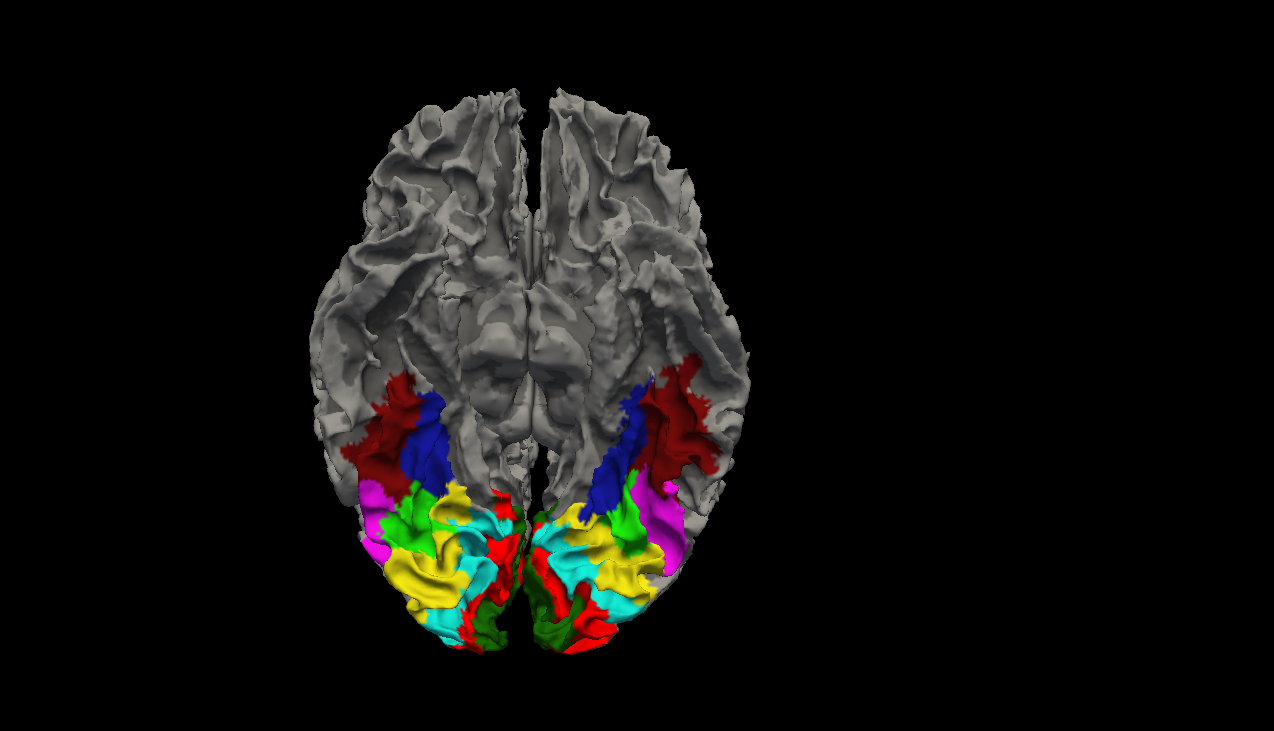

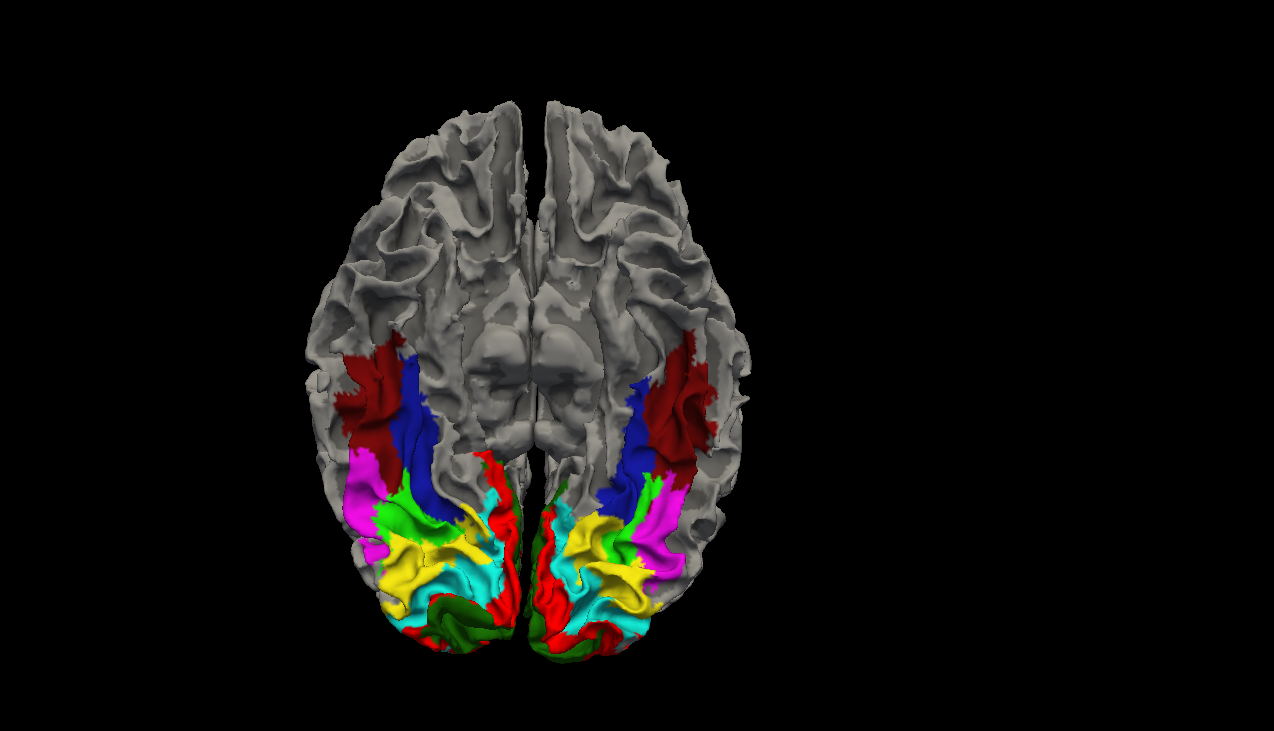

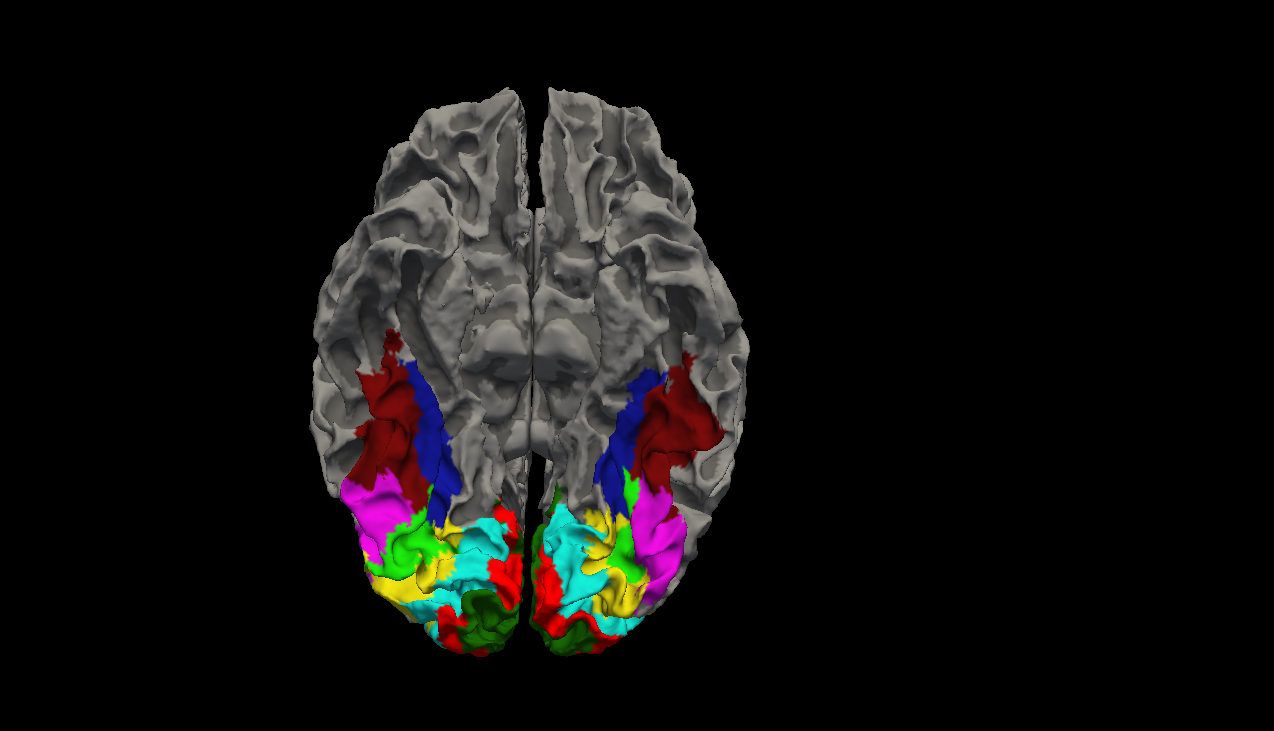

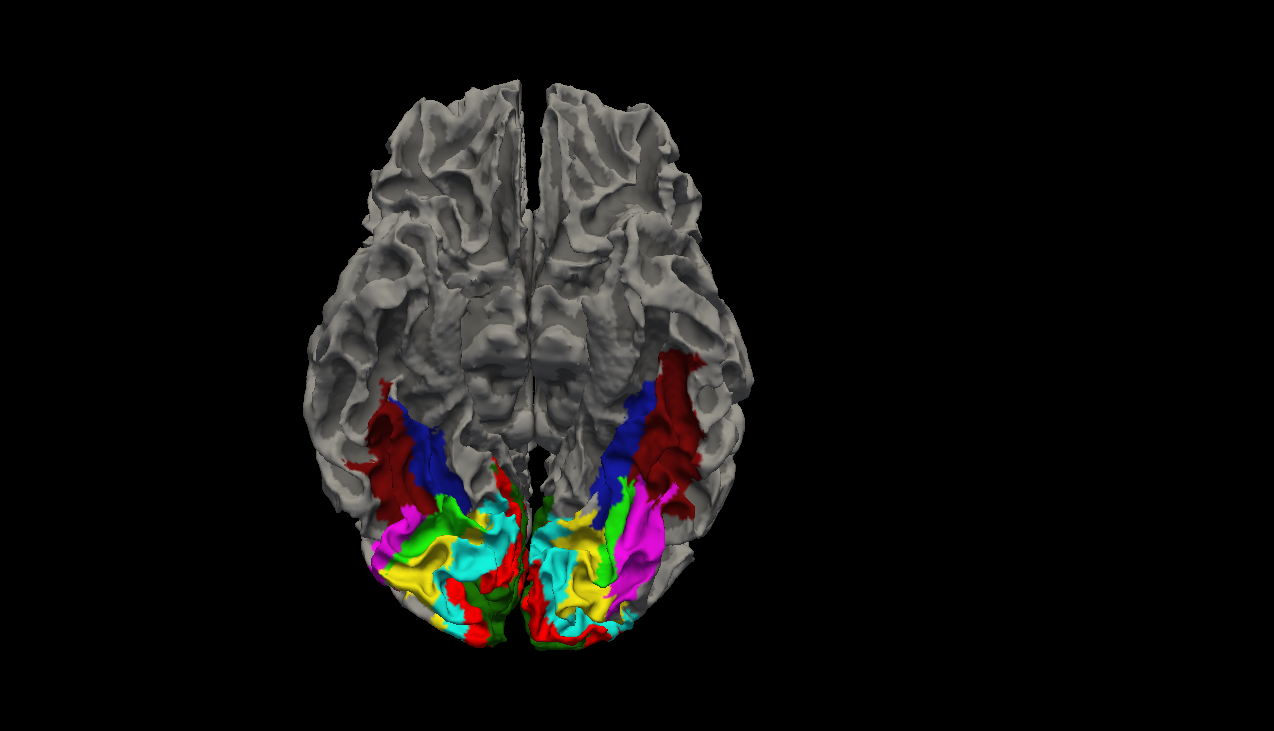

In [80]:
for image in Path('freesurfer_figs').glob('sub-CSI*.png'):
    display(Image(image))

### visfAtlas

In [377]:
%%bash
for subject in {1..4}
do
    for hemi in lh rh
    do
        mri_surf2surf --srcsubject fsaverage \
                      --trgsubject sub-CSI$subject \
                      --hemi $hemi \
                      --sval-annot visfAtlas \
                      --tval ${hemi}.visfAtlas.annot
    done
done

Setting mapmethod to nnf

7.2.0

setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
cd /s/chopin/a/grad/wpickard/fmri-gen
mri_surf2surf --srcsubject fsaverage --trgsubject sub-CSI1 --hemi lh --sval-annot visfAtlas --tval lh.visfAtlas.annot 

sysname  Linux
hostname blue
machine  x86_64
user     wpickard
srcsubject = fsaverage
srcval     = (null)
srctype    = 
trgsubject = sub-CSI1
trgval     = lh.visfAtlas.annot
trgtype    = 
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading source surface reg /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.sphere.reg
Loading source data
Reading surface file /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/surf/lh.orig
Reading target surface reg /s/babbage/b/n

In [379]:
%%bash
for subject in {1..4}
do
    freeview \
        -ss ~/fmri-gen/freesurfer_figs/sub-CSI${subject}_visfAtlas_inferior 1 1 \
        -f ${SUBJECTS_DIR}/sub-CSI${subject}/surf/lh.white:annot=visfAtlas \
        -f ${SUBJECTS_DIR}/sub-CSI${subject}/surf/rh.white:annot=visfAtlas \
        -view inferior
done

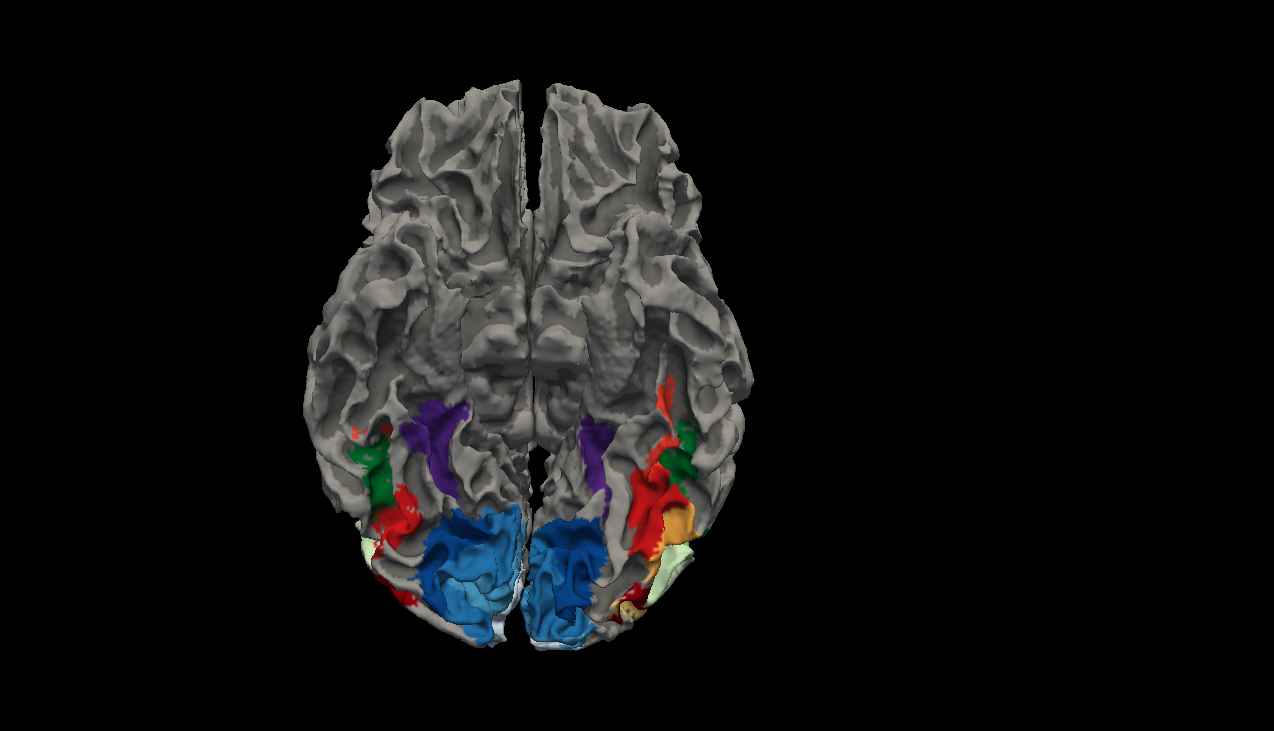

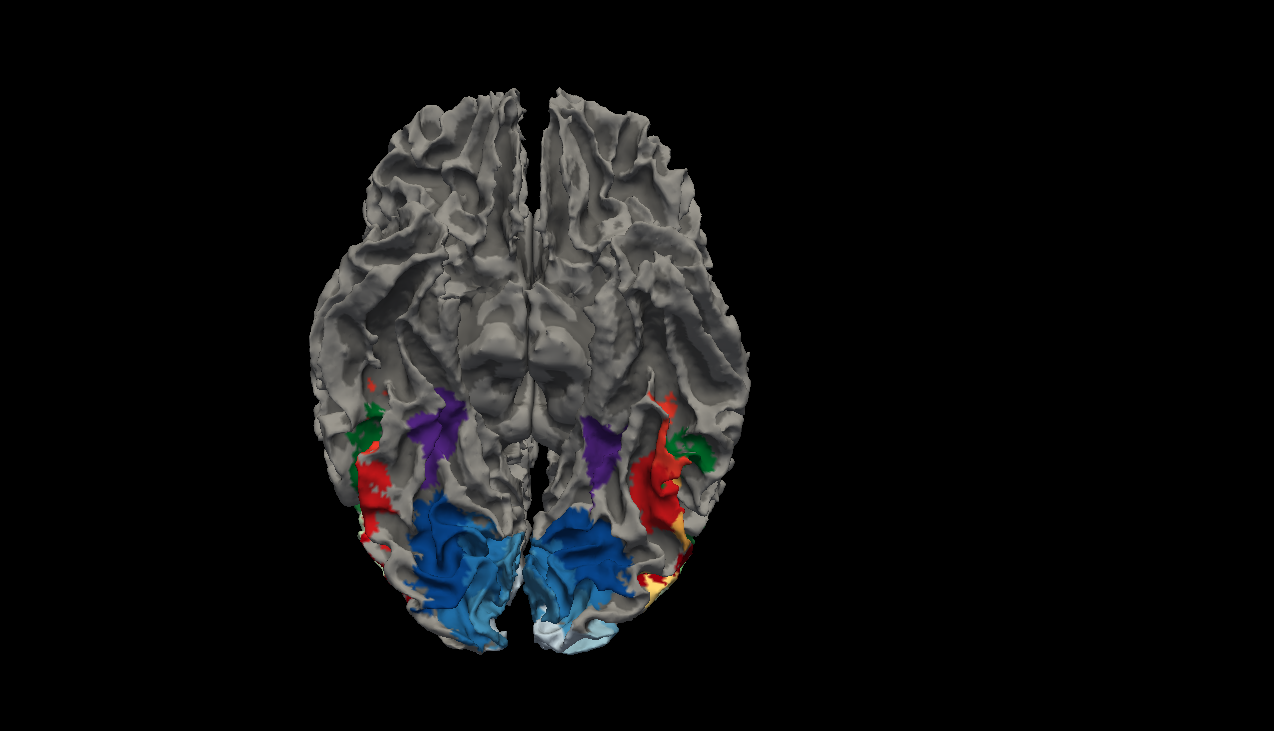

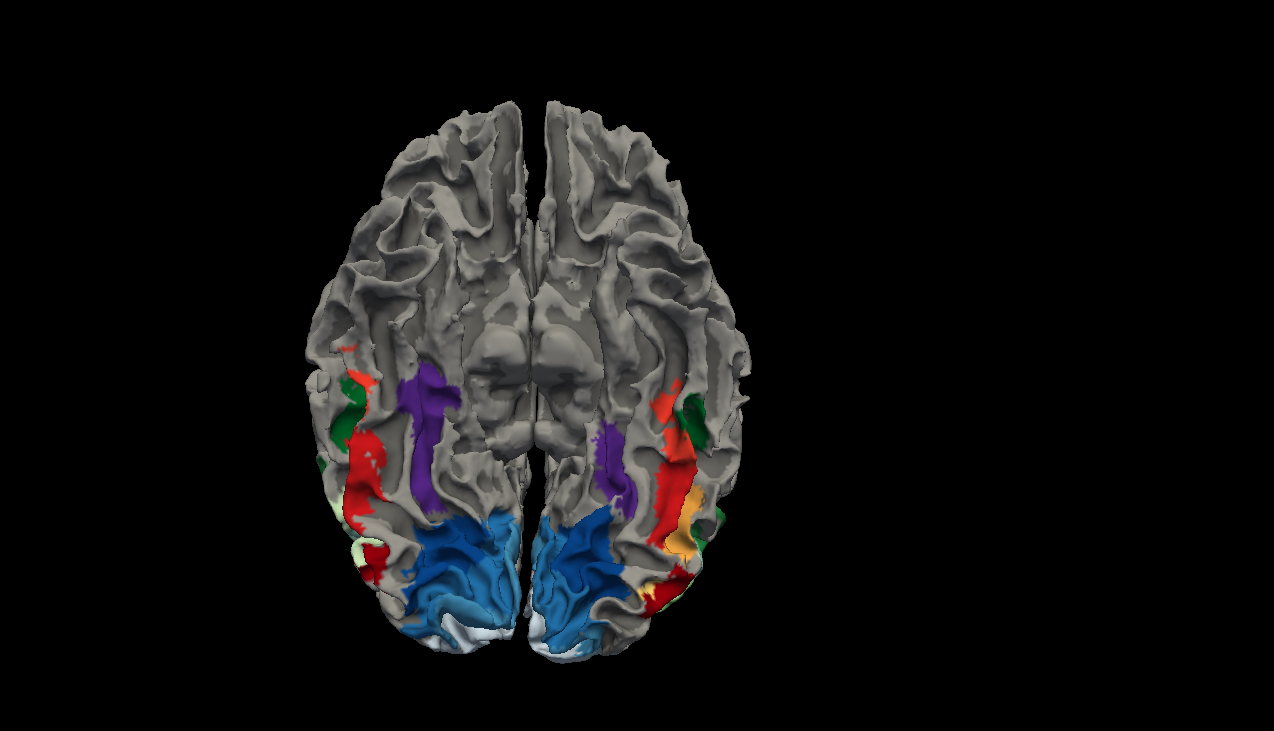

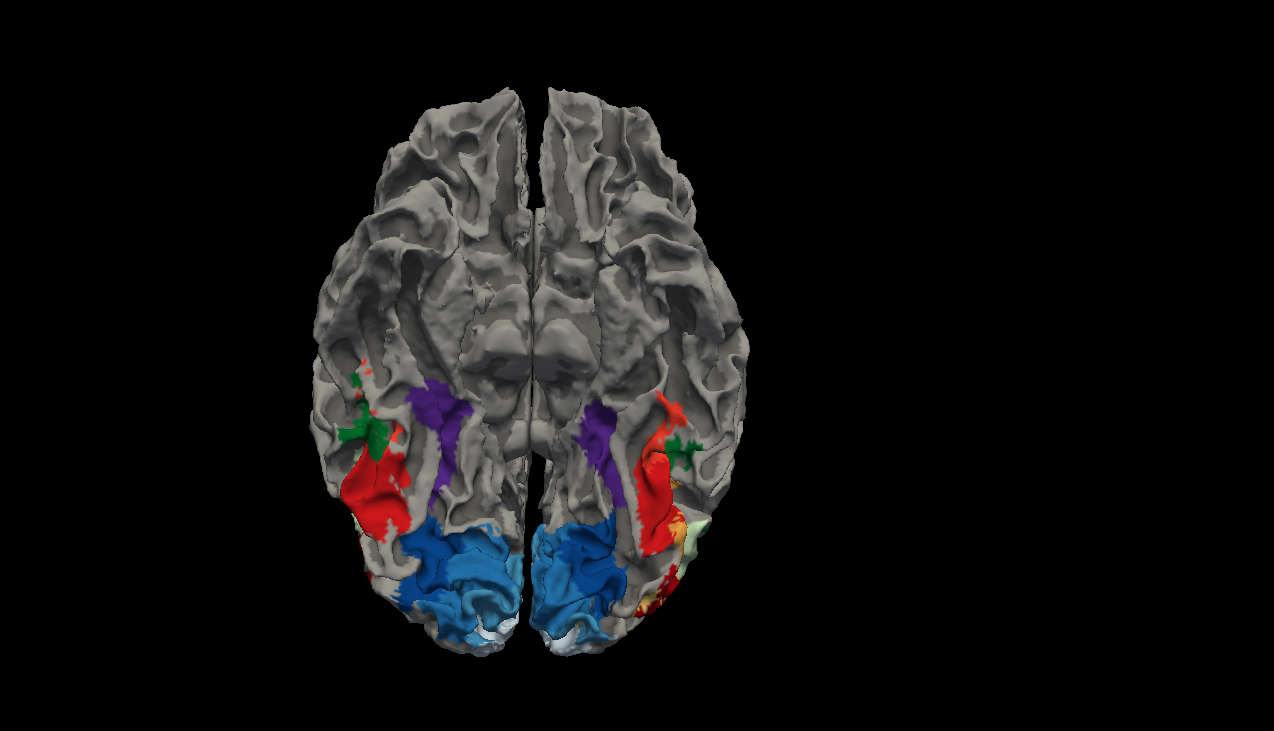

In [380]:
for image in Path('freesurfer_figs').glob('*visfAtlas*.png'):
    display(Image(image))

## Convert Surface Atlas to Volumetric Mask

In [85]:
%%bash
mri_label2vol --subject fsaverage \
               --hemi lh \
               --annot Rosenke_vcAtlas \
               --temp ${SUBJECTS_DIR}/fsaverage/mri/brainmask.mgz \
               --identity \
               --o ${SUBJECTS_DIR}/fsaverage/mri/lh.Rosenke_vcAtlas.nii.gz \
               --proj frac 0 1 .1

Number of labels: 0
Annot File:      Rosenke_vcAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/mri/brainmask.mgz
Outut Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/fsaverage/mri/lh.Rosenke_vcAtlas.nii.gz
Registration File: (null)
Fill Threshold: 0
Label Vox Vol:  1
ProjType:       frac
ProjTypeId:     2
ProjStart:      0
ProjStop:       1
ProjDelta:      0.1
Subject:  fsaverage
Hemi:     lh
UseNewASeg2Vol:  0
DoLabelStatVol  0
LabelCodeOffset  0
setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
7.2.0
Template RAS-to-Vox: --------
-1.00000  -0.00000  -0.00000   128.00000;
-0.00000  -0.00000  -1.00000   128.00000;
-0.00000   1.00000  -0.00000   128.00000;
-0.00000  -0.00000  -0.00000   1.00000;
Template Voxel Volume: 1
nHits Thresh: 0
Using Identity Matrix
RegMat: --------
 1.00000   0.00000   0.00000   0.00000;
 0.00000   1.00000   0.

In [168]:
%%bash
freeview ${SUBJECTS_DIR}/fsaverage/mri/lh.Rosenke_vcAtlas.nii.gz \
         ${SUBJECTS_DIR}/fsaverage/mri/T1.mgz \
         -f ${SUBJECTS_DIR}/fsaverage/surf/lh.white \
         -f ${SUBJECTS_DIR}/fsaverage/surf/lh.pial

In [100]:
%%bash
mri_label2vol --subject sub-CSI1 \
               --hemi lh \
               --annot Rosenke_vcAtlas \
               --temp ${SUBJECTS_DIR}/sub-CSI1/mri/T2.mgz \
               --identity \
               --o ${SUBJECTS_DIR}/sub-CSI1/mri/lh.Rosenke_vcAtlas.nii.gz \
               --proj frac 0 1 .1

Number of labels: 0
Annot File:      Rosenke_vcAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../../../bold5000r2/CSI1_brainmask.nii.gz
Outut Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/mri/lh.Rosenke_vcAtlas1.nii.gz
Registration File: (null)
Fill Threshold: 0
Label Vox Vol:  1
ProjType:       frac
ProjTypeId:     2
ProjStart:      0
ProjStop:       1
ProjDelta:      0.1
Subject:  sub-CSI1
Hemi:     lh
UseNewASeg2Vol:  0
DoLabelStatVol  0
LabelCodeOffset  0
setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
7.2.0
niiRead(): detected input as 64 bit double, reading in as 32 bit float
Template RAS-to-Vox: --------
-0.50000  -0.00000  -0.00000   35.50000;
-0.00000  -0.00000  -0.50000   44.50000;
-0.00000   0.50000  -0.00000   36.00000;
-0.00000  -0.00000  -0.00000   1.00000;
Template Voxel Volume: 8
nHits Thresh: 0
Using Identity Matrix

In [166]:
%%bash
freeview -v ${SUBJECTS_DIR}/sub-CSI1/mri/T1.mgz \
         -v ${SUBJECTS_DIR}/sub-CSI1/mri/lh.Rosenke_vcAtlas.nii.gz:colormap=lut:lut=${SUBJECTS_DIR}/Rosenke_vcAtlasLUT.txt \
         -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.white \
         -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.pial:annot=Rosenke_vcAtlas

### Target FMRI Space

In [312]:
!ls $SUBJECTS_DIR/../spm/sub-CSI1

sub-CSI1_atlas-LH.nii.gz	 sub-CSI1_mask-LHRSC.nii.gz
sub-CSI1_atlas-RH.nii.gz	 sub-CSI1_mask-RHEarlyVis.nii.gz
sub-CSI1_mask-LHEarlyVis.nii.gz  sub-CSI1_mask-RHLOC.nii.gz
sub-CSI1_mask-LHLOC.nii.gz	 sub-CSI1_mask-RHOPA.nii.gz
sub-CSI1_mask-LHOPA.nii.gz	 sub-CSI1_mask-RHPPA.nii.gz
sub-CSI1_mask-LHPPA.nii.gz	 sub-CSI1_mask-RHRSC.nii.gz


In [317]:
%%bash
mri_label2vol \
    --subject sub-CSI1 \
    --hemi lh \
    --annot Rosenke_vcAtlas \
    --regheader $SUBJECTS_DIR/sub-CSI1/mri/orig.mgz \
    --temp $SUBJECTS_DIR/../spm/sub-CSI1/sub-CSI1_mask-LHEarlyVis.nii.gz \
    --proj frac 0 1 .1 \
    --o test.nii.gz

Number of labels: 0
Annot File:      Rosenke_vcAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../spm/sub-CSI1/sub-CSI1_mask-LHEarlyVis.nii.gz
Outut Volume: test.nii.gz
Registration File: (null)
Fill Threshold: 0
Label Vox Vol:  1
ProjType:       frac
ProjTypeId:     2
ProjStart:      0
ProjStop:       1
ProjDelta:      0.1
Subject:  sub-CSI1
Hemi:     lh
UseNewASeg2Vol:  0
DoLabelStatVol  0
LabelCodeOffset  0
setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
7.2.0
Template RAS-to-Vox: --------
-0.50000  -0.00000  -0.00000   35.50000;
-0.00000  -0.00000  -0.50000   44.50000;
-0.00000   0.50000  -0.00000   36.00000;
-0.00000  -0.00000  -0.00000   1.00000;
Template Voxel Volume: 8
nHits Thresh: 0
Computing registration based on header
RegMat: --------
-1.00000   0.00000   0.00000  -1.00000;
 0.00000   0.00000   1.00000  -26.00000;
 0.00000  -1.00000   0.00000  -21.00000;
 0.00000   0.00

In [323]:
%%bash
freeview \
    -v $SUBJECTS_DIR/sub-CSI1/mri/T1.mgz \
    -v test.nii.gz:colormap=lut:lut=${SUBJECTS_DIR}/Rosenke_vcAtlasLUT.txt \
    -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.white \
    -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.pial:annot=Rosenke_vcAtlas

### Perform for Each Subject

In [427]:
%%bash
label2vol(){
    mask_dir=freesurfer/$1/mri

    # Ensure output directory exists
    mkdir -p $mask_dir

    # Generate volumetric mask
    # Modified to resample to FMRI space from fsnative
    mri_label2vol \
        --subject $1 \
        --hemi $2 \
        --annot Rosenke_vcAtlas \
        --regheader $SUBJECTS_DIR/$1/mri/orig.mgz \
        --temp $SUBJECTS_DIR/../spm/$1/$1_mask-LHEarlyVis.nii.gz \
        --proj frac 0 1 .1 \
        --o $mask_dir/$2.Rosenke_vcAtlas.nii.gz
}

subjects=$(find $SUBJECTS_DIR -maxdepth 1 -type d -name 'sub*' -exec basename {} ';')

for subject in $subjects; do
    for hemi in lh rh; do
        label2vol $subject $hemi &
    done
done

Number of labels: 0
Annot File:      Rosenke_vcAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../spm/sub-CSI3/sub-CSI3_mask-LHEarlyVis.nii.gz
Outut Volume: freesurfer/sub-CSI3/mri/rh.Rosenke_vcAtlas.nii.gz
Registration File: (null)
Fill Threshold: 0
Label Vox Vol:  1
ProjType:       frac
ProjTypeId:     2
ProjStart:      0
ProjStop:       1
ProjDelta:      0.1
Subject:  sub-CSI3
Hemi:     rh
UseNewASeg2Vol:  0
DoLabelStatVol  0
LabelCodeOffset  0
setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
7.2.0
Template RAS-to-Vox: --------
-0.50000  -0.00000  -0.00000   36.00000;
-0.00000  -0.00000  -0.50000   44.00000;
-0.00000   0.50000  -0.00000   33.50000;
-0.00000  -0.00000  -0.00000   1.00000;
Number of labels: 0
Annot File:      Rosenke_vcAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../spm/sub-CSI2/sub-CSI2_mask-LHEarlyVis.nii.gz

In [331]:
%%bash
view(){
    freeview \
        -viewport 'axial' \
        -ss freesurfer_figs/$1_vcAtlas_volume.png 1 1 \
        -v $SUBJECTS_DIR/$1/mri/T1.mgz \
        -v mask/$1/lh.Rosenke_vcAtlas.nii.gz:colormap=lut:lut=$SUBJECTS_DIR/Rosenke_vcAtlasLUT.txt \
        -v mask/$1/rh.Rosenke_vcAtlas.nii.gz:colormap=lut:lut=$SUBJECTS_DIR/Rosenke_vcAtlasLUT.txt \
        -f $SUBJECTS_DIR/$1/surf/lh.white:edgecolor='white' \
        -f $SUBJECTS_DIR/$1/surf/lh.pial:annot=Rosenke_vcAtlas \
        -f $SUBJECTS_DIR/$1/surf/rh.white:edgecolor='white' \
        -f $SUBJECTS_DIR/$1/surf/rh.pial:annot=Rosenke_vcAtlas
}

subjects=$(find $SUBJECTS_DIR -maxdepth 1 -type d -name 'sub*' -exec basename {} ';')

for subject in $subjects; do
    view $subject
done

In [354]:
%%bash
freeview \
    -viewport 'axial' \
    -v $SUBJECTS_DIR/sub-CSI1/mri/T1.mgz \
    -v mask/sub-CSI1/lh.Rosenke_vcAtlas.nii.gz:colormap=lut:lut=$SUBJECTS_DIR/Rosenke_vcAtlasLUT.txt \
    -v mask/sub-CSI1/rh.Rosenke_vcAtlas.nii.gz:colormap=lut:lut=$SUBJECTS_DIR/Rosenke_vcAtlasLUT.txt \
    -f $SUBJECTS_DIR/sub-CSI1/surf/lh.white:edgecolor='white' \
    -f $SUBJECTS_DIR/sub-CSI1/surf/lh.pial:annot=Rosenke_vcAtlas \
    -f $SUBJECTS_DIR/sub-CSI1/surf/rh.white:edgecolor='white' \
    -f $SUBJECTS_DIR/sub-CSI1/surf/rh.pial:annot=Rosenke_vcAtlas

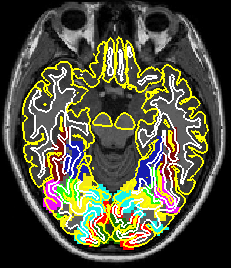

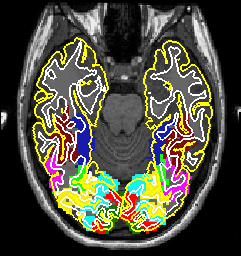

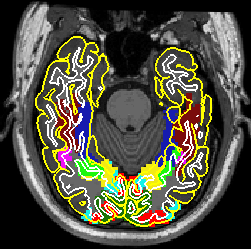

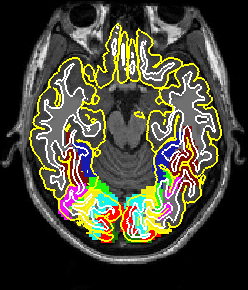

In [405]:
for ss in Path('freesurfer_figs').glob('*vcAtlas_volume*'):
    display(Image(ss))

#### visfAtlas

In [426]:
%%bash
label2vol(){
    mask_dir=freesurfer/$1/mri

    # Ensure output directory exists
    mkdir -p $mask_dir

    # Generate volumetric mask
    # Modified to resample to FMRI space from fsnative
    mri_label2vol \
        --subject $1 \
        --hemi $2 \
        --annot visfAtlas \
        --regheader $SUBJECTS_DIR/$1/mri/orig.mgz \
        --temp $SUBJECTS_DIR/../spm/$1/$1_mask-LHEarlyVis.nii.gz \
        --proj frac 0 1 .1 \
        --o $mask_dir/$2.visfAtlas.nii.gz
}

subjects=$(find $SUBJECTS_DIR -maxdepth 1 -type d -name 'sub*' -exec basename {} ';')

for subject in $subjects; do
    for hemi in lh rh; do
        label2vol $subject $hemi &
    done
done

Number of labels: 0
Annot File:      visfAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../spm/sub-CSI1/sub-CSI1_mask-LHEarlyVis.nii.gz
Outut Volume: freesurfer/sub-CSI1/mri/rh.visfAtlas.nii.gz
Registration File: (null)
Fill Threshold: 0
Label Vox Vol:  1
ProjType:       frac
ProjTypeId:     2
ProjStart:      0
ProjStop:       1
ProjDelta:      0.1
Subject:  sub-CSI1
Hemi:     rh
UseNewASeg2Vol:  0
DoLabelStatVol  0
LabelCodeOffset  0
setenv SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
7.2.0
Template RAS-to-Vox: --------
-0.50000  -0.00000  -0.00000   35.50000;
-0.00000  -0.00000  -0.50000   44.50000;
-0.00000   0.50000  -0.00000   36.00000;
-0.00000  -0.00000  -0.00000   1.00000;
Number of labels: 0
Annot File:      visfAtlas
Template Volume: /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/../spm/sub-CSI1/sub-CSI1_mask-LHEarlyVis.nii.gz
Outut Volume: fre

In [441]:
%%bash
view(){
    freeview \
        -viewport 'axial' \
        -ss freesurfer_figs/$1_visfAtlas_volume.png 1 1 \
        -v $SUBJECTS_DIR/$1/mri/T1.mgz \
        -v mask/$1/lh.visfAtlas.nii.gz:colormap=lut:lut=freesurfer/lh.visfAtlasLUT.txt \
        -v mask/$1/rh.visfAtlas.nii.gz:colormap=lut:lut=freesurfer/rh.visfAtlasLUT.txt \
        -f $SUBJECTS_DIR/$1/surf/lh.white:edgecolor='white' \
        -f $SUBJECTS_DIR/$1/surf/lh.pial:annot=visfAtlas \
        -f $SUBJECTS_DIR/$1/surf/rh.white:edgecolor='white' \
        -f $SUBJECTS_DIR/$1/surf/rh.pial:annot=visfAtlas
}

subjects=$(find $SUBJECTS_DIR -maxdepth 1 -type d -name 'sub*' -exec basename {} ';')

for subject in $subjects; do
    view $subject
done

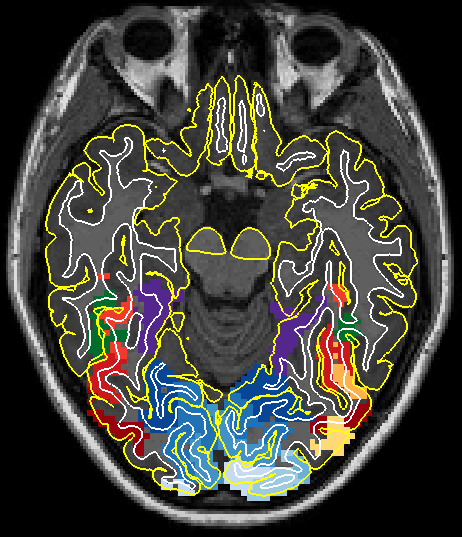

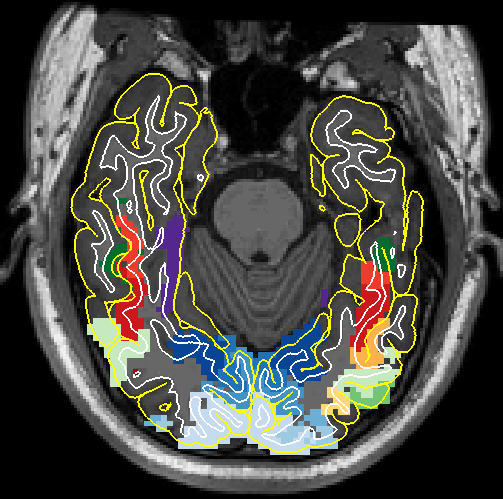

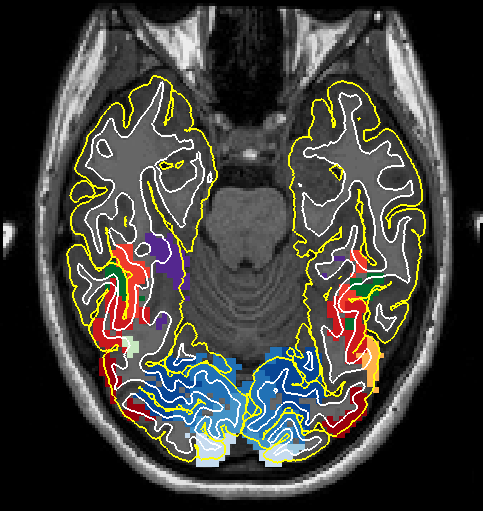

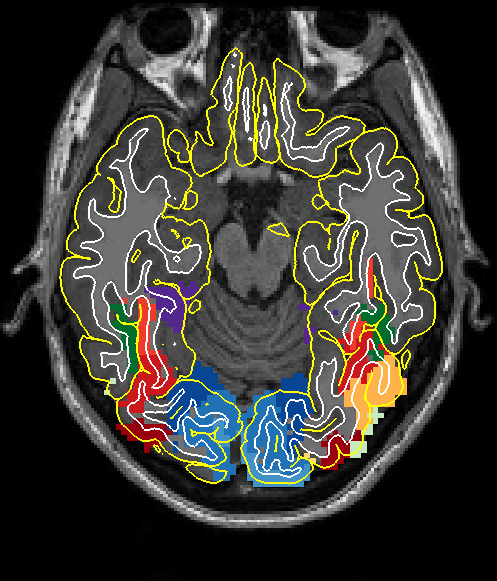

In [442]:
for ss in Path('freesurfer_figs').glob('*visfAtlas_volume*'):
    display(Image(ss))

### Quality Check: Make sure affines and orientations line up

In [444]:
atlas_img = nib.load(Path('freesurfer') / 'sub-CSI1' / 'mri' / 'lh.Rosenke_vcAtlas.nii.gz')

In [445]:
print(atlas_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 71 89 72  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 2. 2. 2. 0. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Jul 20 2021'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -67.26271
qoffset_y       : -113.77284
qoffset_z       : -60.588486
srow_x          : [  2

In [446]:
csi1_anat = nib.load(dataset_v1 / 'BOLD5000_Structural' / 'CSI1_Structural' / 'T1w_MPRAGE_CSI1.nii')

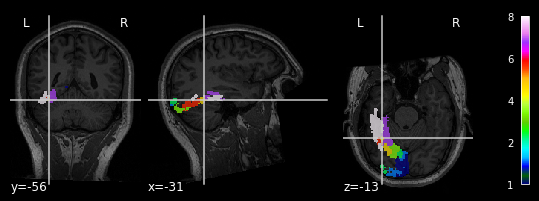

In [447]:
plotting.plot_roi(atlas_img, csi1_anat, colorbar=True)

In [449]:
bold_atlas_img = nib.load(dataset_v1 / 'derivatives' / 'spm' / 'sub-CSI1' / 'sub-CSI1_atlas-LH.nii.gz')

In [459]:
bold_atlas_img.affine

array([[   2.        ,    0.        ,    0.        ,  -67.26271057],
       [   0.        ,    2.        ,    0.        , -113.77284241],
       [   0.        ,    0.        ,    2.        ,  -60.58848572],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [453]:
assert np.array_equal(bold_atlas_img.affine, atlas_img.affine)

In [460]:
assert bold_atlas_img.shape == atlas_img.shape

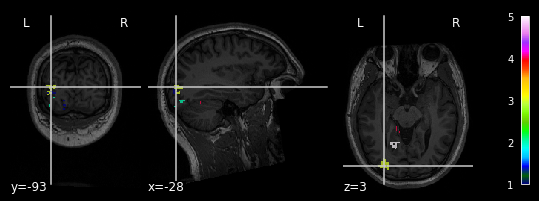

In [461]:
plotting.plot_roi(bold_atlas_img, csi1_anat, colorbar=True)

### ~~Convert to FMRI (T2) space~~

NOTE: Fixed above!

In [296]:
csi1_mask = nib.load(dataset_v1 / 'derivatives' / 'spm' / 'sub-CSI1' / 'sub-CSI1_mask-LHEarlyVis.nii.gz' )

In [299]:
print(csi1_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 71 89 72  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -67.26271
qoffset_y       : -113.77284
qoffset_z       : -60.588486
srow_x          : [  2.        0.        0. 

In [304]:
atlas_convert = image.resample_to_img(img, csi1_mask, interpolation='nearest')

In [307]:
np.unique(atlas_convert.get_fdata())

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

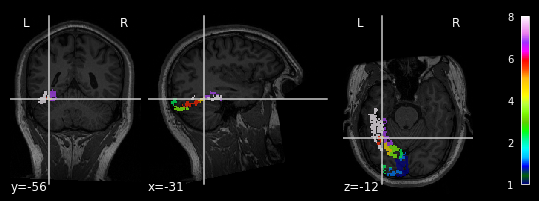

In [308]:
plotting.plot_roi(atlas_convert, csi1_anat, colorbar=True)

## Visualize ROI Coverage
### Convert original ROIs to surface labels

In [175]:
%env SPM_ROIS_DIR=/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/spm/

env: SPM_ROIS_DIR=/s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/spm/


In [357]:
%%bash
mri_vol2surf --mov ${SPM_ROIS_DIR}/sub-CSI1/sub-CSI1_mask-LHLOC.nii.gz \
             --regheader sub-CSI1 \
             --hemi lh \
             --projfrac 1 \
             --o ./lh.LOC.pf1.mgz

srcvol = /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/spm//sub-CSI1/sub-CSI1_mask-LHLOC.nii.gz
srcreg unspecified
srcregold = 0
srcwarp unspecified
surf = white
hemi = lh
ProjFrac = 1
thickness = thickness
reshape = 0
interp = nearest
float2int = round
GetProjMax = 0
INFO: float2int code = 0
INFO: changing type to float
Done loading volume
Computing registration from header.
  Using /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/mri/orig.mgz as target reference.
-------- original matrix -----------
-1.00000   0.00000   0.00000  -1.00000;
 0.00000   0.00000   1.00000  -26.00000;
 0.00000  -1.00000   0.00000  -21.00000;
 0.00000   0.00000   0.00000   1.00000;
-------- original matrix -----------
Reading surface /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Done reading source surface
Reading thickness /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/f

In [276]:
%%bash
mri_vol2label --i ./lh.LOC.mgz \
              --surf sub-CSI1 lh \
              --id 1 \
              --l ${SUBJECTS_DIR}/sub-CSI1/label/lh.BOLD5000.LOC.label

Loading mri ./lh.LOC.mgz
Scanning the volume
Centroid: -39.59  -80.39    2.11 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 717 label voxels
Writing label file /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/label/lh.BOLD5000.LOC.label


In [358]:
%%bash
freeview -f $SUBJECTS_DIR/sub-CSI1/surf/lh.inflated:overlay=~/fmri-gen/lh.LOC.pd3.mgz:overlay=~/fmri-gen/lh.LOC.pf1.mgz:overlay=~/fmri-gen/lh.LOC.mgz

In [280]:
%%bash
freeview \
    -f $SUBJECTS_DIR/sub-CSI3/surf/lh.white:overlay=~/fmri-gen/overlay/sub-CSI3/lh.LOC.mgz \
    -f $SUBJECTS_DIR/sub-CSI3/surf/lh.pial:overlay=~/fmri-gen/overlay/sub-CSI3/lh.LOC.mgz

niiRead(): NIFTI_UNITS_UNKNOWN, assuming mm
niiRead(): detected input as 64 bit double, reading in as 32 bit float
niiRead(): detected input as 64 bit double, reading in as 32 bit float


### Generate Labels for all Subjects

In [372]:
%%bash
mask2label(){
    # Split filname into subject, hemisphere and ROI name
    parse=($(basename $1 | sed -E 's/^(.*)_mask-(LH|RH)(.*)\.nii\.gz$/\1 \L\2\E \3/'))
    subject=${parse[0]}
    hemi=${parse[1]}
    roi=${parse[2]}
    
    surf_dir=freesurfer/$subject/surf
    label_dir=freesurfer/$subject/label
    
    # Make sure output directory exists
    mkdir -p $surf_dir
    mkdir -p $label_dir
    
    # Map volume onto surface as an "overlay"
    mri_vol2surf \
        --mov $1 \
        --regheader $subject \
        --hemi $hemi \
        --projfrac 1 \
        --o $surf_dir/$hemi.$roi.mgz
                 
    # Convert overlay to label
    mri_vol2label \
        --i $surf_dir/$hemi.$roi.mgz \
        --surf $subject $hemi \
        --id 1 \
        --l $label_dir/$hemi.$roi.label
}

masks=$(find $SPM_ROIS_DIR -type f -name '*mask*.nii.gz')

for mask in $masks; do
    mask2label $mask &
done

srcvol = /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/spm/sub-CSI3/sub-CSI3_mask-RHLOC.nii.gz
srcreg unspecified
srcregold = 0
srcwarp unspecified
surf = white
hemi = rh
ProjFrac = 1
thickness = thickness
reshape = 0
interp = nearest
float2int = round
GetProjMax = 0
INFO: float2int code = 0
niiRead(): NIFTI_UNITS_UNKNOWN, assuming mm
niiRead(): detected input as 64 bit double, reading in as 32 bit float
Done loading volume
Computing registration from header.
  Using /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/mri/orig.mgz as target reference.
-------- original matrix -----------
-1.00000   0.00000   0.00000   0.00000;
 0.00000   0.00000   1.00000  -19.00000;
 0.00000  -1.00000   0.00000  -10.00000;
 0.00000   0.00000   0.00000   1.00000;
srcvol = /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/spm/sub-CSI3/sub-CSI3_mask-RHEarlyVis.nii.gz
srcreg unspecified
srcregold = 0
srcwarp unspecified
surf = whi

Loading mri freesurfer/sub-CSI2/surf/lh.LOC.mgz
Loading mri freesurfer/sub-CSI3/surf/rh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI2/surf/lh.PPA.mgz
Loading mri freesurfer/sub-CSI1/surf/lh.PPA.mgz
Loading mri freesurfer/sub-CSI1/surf/rh.RSC.mgz
Loading mri freesurfer/sub-CSI3/surf/rh.OPA.mgz
Loading mri freesurfer/sub-CSI1/surf/rh.PPA.mgz
Loading mri freesurfer/sub-CSI4/surf/rh.OPA.mgz
Loading mri freesurfer/sub-CSI3/surf/rh.RSC.mgz
Loading mri freesurfer/sub-CSI1/surf/lh.LOC.mgz
Loading mri freesurfer/sub-CSI1/surf/rh.LOC.mgz
Loading mri freesurfer/sub-CSI1/surf/rh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI2/surf/lh.OPA.mgz
Loading mri freesurfer/sub-CSI3/surf/lh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI3/surf/lh.RSC.mgz
Loading mri freesurfer/sub-CSI4/surf/lh.RSC.mgz
Loading mri freesurfer/sub-CSI3/surf/lh.OPA.mgz
Loading mri freesurfer/sub-CSI1/surf/rh.OPA.mgz
Loading mri freesurfer/sub-CSI4/surf/rh.RSC.mgz
Loading mri freesurfer/sub-CSI4/surf/lh.EarlyVis.mgz


-------- original matrix -----------
Reading surface /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Done reading source surface
Reading thickness /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.thickness
Number of source voxels hit = 27239
Writing to freesurfer/sub-CSI1/surf/rh.OPA.mgz
Dim: 137996 1 1
Number of source voxels hit = 27658
Writing to freesurfer/sub-CSI4/surf/rh.RSC.mgz
Dim: 146721 1 1
-------- original matrix -----------
Reading surface /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Done reading source surface
Reading thickness /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.thickness
Done
Mapping Source Volume onto Source Subject Surface
-------- original matrix -----------
Reading surface /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/s

Loading mri freesurfer/sub-CSI1/surf/lh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI1/surf/lh.OPA.mgz
Loading mri freesurfer/sub-CSI1/surf/lh.RSC.mgz
Loading mri freesurfer/sub-CSI4/surf/rh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI4/surf/lh.LOC.mgz


 1 1 1 1
using old
-------- original matrix -----------
Reading surface /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Done reading source surface
Done mapping volume to surface
Done mapping volume to surface
Number of source voxels hit = 28187
Writing to freesurfer/sub-CSI2/surf/lh.RSC.mgz
Dim: 149697 1 1
 1 1 1 1
using old
Reading thickness /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.thickness
Done
Mapping Source Volume onto Source Subject Surface
Done mapping volume to surface
 1 1 1 1
using old
Done mapping volume to surface
Number of source voxels hit = 27658
Writing to freesurfer/sub-CSI4/surf/rh.LOC.mgz
Dim: 146721 1 1
Number of source voxels hit = 27782
Writing to freesurfer/sub-CSI2/surf/rh.EarlyVis.mgz
Dim: 149730 1 1
 1 1 1 1
using old
Done mapping volume to surface
Number of source voxels hit = 27431
Writing to freesurfer/sub-CSI3/surf/lh.LOC.mgz
Dim: 138684 1 1
Number

Loading mri freesurfer/sub-CSI3/surf/rh.LOC.mgz
Loading mri freesurfer/sub-CSI2/surf/lh.RSC.mgz
Loading mri freesurfer/sub-CSI4/surf/rh.LOC.mgz
Loading mri freesurfer/sub-CSI3/surf/lh.LOC.mgz
Loading mri freesurfer/sub-CSI2/surf/rh.EarlyVis.mgz
Loading mri freesurfer/sub-CSI4/surf/lh.OPA.mgz
Loading mri freesurfer/sub-CSI4/surf/rh.PPA.mgz
Loading mri freesurfer/sub-CSI4/surf/lh.PPA.mgz
Loading mri freesurfer/sub-CSI3/surf/lh.PPA.mgz
Loading mri freesurfer/sub-CSI2/surf/lh.EarlyVis.mgz


Done
Mapping Source Volume onto Source Subject Surface
Done
Mapping Source Volume onto Source Subject Surface
Done
Mapping Source Volume onto Source Subject Surface
Done
Mapping Source Volume onto Source Subject Surface
 1 1 1 1
using old
Done mapping volume to surface


Loading mri freesurfer/sub-CSI2/surf/rh.OPA.mgz


 1 1 1 1
using old
Number of source voxels hit = 27782
Writing to freesurfer/sub-CSI2/surf/rh.PPA.mgz
Dim: 149730 1 1
Done mapping volume to surface
 1 1 1 1
using old
 1 1 1 1
using old
Done mapping volume to surface
Done mapping volume to surface


Loading mri freesurfer/sub-CSI2/surf/rh.PPA.mgz


Number of source voxels hit = 27854
Writing to freesurfer/sub-CSI3/surf/rh.PPA.mgz
Dim: 141511 1 1
Number of source voxels hit = 27782
Writing to freesurfer/sub-CSI2/surf/rh.RSC.mgz
Dim: 149730 1 1
Number of source voxels hit = 27782
Writing to freesurfer/sub-CSI2/surf/rh.LOC.mgz
Dim: 149730 1 1


Loading mri freesurfer/sub-CSI3/surf/rh.PPA.mgz
Loading mri freesurfer/sub-CSI2/surf/rh.RSC.mgz
Loading mri freesurfer/sub-CSI2/surf/rh.LOC.mgz
Scanning the volume
Scanning the volume
Centroid:  18.90  -80.26   10.77 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/rh.white
Found 2580 label voxels
Writing label file freesurfer/sub-CSI3/label/rh.EarlyVis.label


Scanning the volume
Centroid:  15.67  -63.69   26.65 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/rh.white
Found 682 label voxels
Writing label file freesurfer/sub-CSI1/label/rh.RSC.label


Scanning the volume
Scanning the volume
Scanning the volume
Scanning the volume
Centroid:  17.12  -44.43   20.99 
mri_cor2label completed SUCCESSFULLY
Centroid: -16.97  -81.03    4.72 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/rh.white
Found 580 label voxels
Writing label file freesurfer/sub-CSI3/label/rh.RSC.label
7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.white
Found 2699 label voxels
Writing label file freesurfer/sub-CSI3/label/lh.EarlyVis.label


Scanning the volume
Centroid: -26.97  -53.54    8.73 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 707 label voxels
Writing label file freesurfer/sub-CSI1/label/lh.PPA.label


Scanning the volume
Centroid:  19.58  -91.51    2.37 
mri_cor2label completed SUCCESSFULLY
Centroid: -35.28  -71.99   12.75 
mri_cor2label completed SUCCESSFULLY
Centroid:  29.12  -71.19   25.58 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/rh.white
Found 1414 label voxels
Writing label file freesurfer/sub-CSI1/label/rh.EarlyVis.label
7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/lh.white
Found 1692 label voxels
Writing label file freesurfer/sub-CSI2/label/lh.LOC.label
7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/rh.white
Found 916 label voxels
Writing label file freesurfer/sub-CSI3/label/rh.OPA.label


Centroid:  39.65  -75.35    2.09 
mri_cor2label completed SUCCESSFULLY
Scanning the volume
Scanning the volume


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/rh.white
Found 732 label voxels
Writing label file freesurfer/sub-CSI1/label/rh.LOC.label


Centroid:  15.34  -57.39   32.23 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Found 1096 label voxels
Writing label file freesurfer/sub-CSI4/label/rh.RSC.label


Centroid: -36.34  -72.31   40.86 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/lh.white
Found 390 label voxels
Writing label file freesurfer/sub-CSI2/label/lh.OPA.label


Scanning the volume
Scanning the volume
Scanning the volume
Centroid: -15.90  -55.22   26.60 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.white
Found 422 label voxels
Writing label file freesurfer/sub-CSI3/label/lh.RSC.label


Centroid: -39.74  -80.00    2.29 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 748 label voxels
Writing label file freesurfer/sub-CSI1/label/lh.LOC.label


Centroid:  25.47  -49.06    5.74 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/rh.white
Found 1028 label voxels
Writing label file freesurfer/sub-CSI1/label/rh.PPA.label


Scanning the volume
Scanning the volume
Centroid: -23.33  -72.31   22.62 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.white
Found 977 label voxels
Writing label file freesurfer/sub-CSI3/label/lh.OPA.label


Centroid:  28.38  -81.08   23.25 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Found 1562 label voxels
Writing label file freesurfer/sub-CSI4/label/rh.OPA.label


Scanning the volume
Centroid: -20.61  -61.78   34.10 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/lh.white
Found 404 label voxels
Writing label file freesurfer/sub-CSI4/label/lh.RSC.label


Scanning the volume
Scanning the volume
Centroid: -24.45  -50.29    8.58 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/lh.white
Found 1304 label voxels
Writing label file freesurfer/sub-CSI2/label/lh.PPA.label


Scanning the volume
Centroid:  21.96  -83.54    4.27 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Found 2309 label voxels
Writing label file freesurfer/sub-CSI4/label/rh.EarlyVis.label


Centroid: -20.93  -88.21   11.87 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/lh.white
Found 2550 label voxels
Writing label file freesurfer/sub-CSI4/label/lh.EarlyVis.label


Scanning the volume
Scanning the volume
Centroid: -17.47  -62.11   24.61 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 510 label voxels
Writing label file freesurfer/sub-CSI1/label/lh.RSC.label


Centroid: -19.31  -93.41    1.04 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 1320 label voxels
Writing label file freesurfer/sub-CSI1/label/lh.EarlyVis.label


Scanning the volume
Centroid: -32.61  -88.68   16.46 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/lh.white
Found 405 label voxels
Writing label file freesurfer/sub-CSI1/label/lh.OPA.label


Scanning the volume
Scanning the volume
Centroid:  36.31  -82.40   21.60 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI1/surf/rh.white
Found 786 label voxels
Writing label file freesurfer/sub-CSI1/label/rh.OPA.label


Centroid: -26.01  -42.63    8.65 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/lh.white
Found 885 label voxels
Writing label file freesurfer/sub-CSI4/label/lh.PPA.label


Scanning the volume
Centroid: -36.81  -71.76    8.41 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.white
Found 1218 label voxels
Writing label file freesurfer/sub-CSI3/label/lh.LOC.label


Scanning the volume
Centroid: -23.72  -38.61    6.49 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.white
Found 701 label voxels
Writing label file freesurfer/sub-CSI3/label/lh.PPA.label


Scanning the volume
Centroid: -13.40  -51.74   25.84 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/lh.white
Found 331 label voxels
Writing label file freesurfer/sub-CSI2/label/lh.RSC.label


Scanning the volume
Centroid:  35.28  -67.91    7.66 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/rh.white
Found 1922 label voxels
Writing label file freesurfer/sub-CSI3/label/rh.LOC.label


Scanning the volume
Centroid: -18.45  -85.65   10.17 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/lh.white
Found 1385 label voxels
Writing label file freesurfer/sub-CSI2/label/lh.EarlyVis.label


Scanning the volume
Scanning the volume
Centroid: -33.82  -76.02   10.32 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/lh.white
Found 2394 label voxels
Writing label file freesurfer/sub-CSI4/label/lh.LOC.label


Centroid: -26.40  -79.89   37.17 
mri_cor2label completed SUCCESSFULLY
Scanning the volume
Scanning the volume
Scanning the volume


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/lh.white
Found 1315 label voxels
Writing label file freesurfer/sub-CSI4/label/lh.OPA.label


Centroid:  25.90  -38.96    6.95 
mri_cor2label completed SUCCESSFULLY
Centroid:  16.28  -78.00   10.88 
mri_cor2label completed SUCCESSFULLY
Centroid:  35.38  -74.78    5.60 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Found 1321 label voxels
Writing label file freesurfer/sub-CSI4/label/rh.PPA.label
7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Found 1038 label voxels
Writing label file freesurfer/sub-CSI2/label/rh.EarlyVis.label
7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI4/surf/rh.white
Found 1986 label voxels
Writing label file freesurfer/sub-CSI4/label/rh.LOC.label


Scanning the volume
Centroid:  22.98  -35.55    5.57 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/rh.white
Found 739 label voxels
Writing label file freesurfer/sub-CSI3/label/rh.PPA.label


Scanning the volume
Centroid:  34.34  -72.75   11.56 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Found 2231 label voxels
Writing label file freesurfer/sub-CSI2/label/rh.LOC.label


Scanning the volume
Centroid:  24.16  -45.22    7.81 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Found 1182 label voxels
Writing label file freesurfer/sub-CSI2/label/rh.PPA.label


Scanning the volume
Centroid:  28.89  -64.86   33.66 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Found 1303 label voxels
Writing label file freesurfer/sub-CSI2/label/rh.RSC.label


Scanning the volume
Centroid:  33.90  -69.32   30.59 
mri_cor2label completed SUCCESSFULLY


7.2.0
Loading surf /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI2/surf/rh.white
Found 526 label voxels
Writing label file freesurfer/sub-CSI2/label/rh.OPA.label


## Create Annotation from Labels

TODO: Handle creating "Unknown" label better

In [403]:
%%bash
label2annot(){

    # Label directory
    label_dir=freesurfer/$1/label
    # Get list of lables
    # TODO: There appears to be a bug in mris_lable2annot. If you do not specify
    # label files explicitly, the automatic ctab file search feature skips "Unknown"
    labels=$(find $label_dir -type f -name "$2.*.label" | sort | xargs printf -- '--l %s ')

    mris_label2annot \
        --subject $1 \
        --hemi $2 \
        --ctab freesurfer/BOLD5000LUT.txt \
        $labels \
        --annot-path $label_dir/$2.BOLD5000.annot
}

subjects=$(find $SUBJECTS_DIR -maxdepth 1 -type d -name 'sub*' -exec basename {} ';')

for subject in $subjects; do
    for hemi in lh rh; do
        label2annot $subject $hemi
    done
done

Reading ctab freesurfer/BOLD5000LUT.txt
Number of ctab entries 6

7.2.0
cwd /s/chopin/a/grad/wpickard/fmri-gen
cmdline mris_label2annot --subject sub-CSI3 --hemi lh --ctab freesurfer/BOLD5000LUT.txt --l freesurfer/sub-CSI3/label/lh.EarlyVis.label --l freesurfer/sub-CSI3/label/lh.LOC.label --l freesurfer/sub-CSI3/label/lh.OPA.label --l freesurfer/sub-CSI3/label/lh.PPA.label --l freesurfer/sub-CSI3/label/lh.RSC.label --annot-path freesurfer/sub-CSI3/label/lh.BOLD5000.annot 
sysname  Linux
hostname blue
machine  x86_64
user     wpickard

subject sub-CSI3
hemi    lh
SUBJECTS_DIR /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer
ColorTable freesurfer/BOLD5000LUT.txt
AnnotPath  freesurfer/sub-CSI3/label/lh.BOLD5000.annot
nlables 5
LabelThresh 0 0.000000
Loading /s/babbage/b/nobackup/nblancha/public-datasets/bold5000/derivatives/freesurfer/sub-CSI3/surf/lh.orig
 1 13095821 EarlyVis
 2 11796479 LOC
 3 14334654 OPA
 4 7504123 PPA
 5 13873536 RSC
Mapping unhit to unk

In [463]:
%%bash
freeview \
    -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.inflated:annot=freesurfer/sub-CSI1/label/lh.BOLD5000.annot \
    -f ${SUBJECTS_DIR}/sub-CSI1/surf/rh.inflated:annot=freesurfer/sub-CSI1/label/rh.BOLD5000.annot 

bash: line 3: 447656 Segmentation fault      (core dumped) freeview -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.inflated:annot=freesurfer/sub-CSI1/label/lh.BOLD5000.annot -f ${SUBJECTS_DIR}/sub-CSI1/surf/rh.inflated:annot=freesurfer/sub-CSI1/label/rh.BOLD5000.annot


CalledProcessError: Command 'b'freeview \\\n    -f ${SUBJECTS_DIR}/sub-CSI1/surf/lh.inflated:annot=freesurfer/sub-CSI1/label/lh.BOLD5000.annot \\\n    -f ${SUBJECTS_DIR}/sub-CSI1/surf/rh.inflated:annot=freesurfer/sub-CSI1/label/rh.BOLD5000.annot \n'' returned non-zero exit status 139.